In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Crop_recommendation.csv')
df.sample(10)

,N,P,K,temperature,humidity,ph,rainfall,label
1466,111,15,54,27.705837,92.911857,6.194090,22.062072,muskmelon
1009,105,77,52,29.162266,76.161516,5.816622,100.007568,banana
676,22,37,20,27.627495,86.493669,6.605733,39.261376,mungbean
1200,24,130,195,29.996772,81.541566,6.112306,67.125345,grapes
197,60,54,19,18.748267,62.498785,6.417820,70.234016,maize
1559,29,139,205,23.641424,93.744615,6.155939,116.691218,apple
1375,88,5,47,25.864755,86.674680,6.662245,41.165548,watermelon
942,4,24,43,22.404235,88.150834,7.199504,109.869520,pomegranate
1278,39,129,203,34.389225,83.183928,5.863997,71.030016,grapes
764,52,58,16,30.640958,61.145086,7.167436,71.369475,blackgram


In [3]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


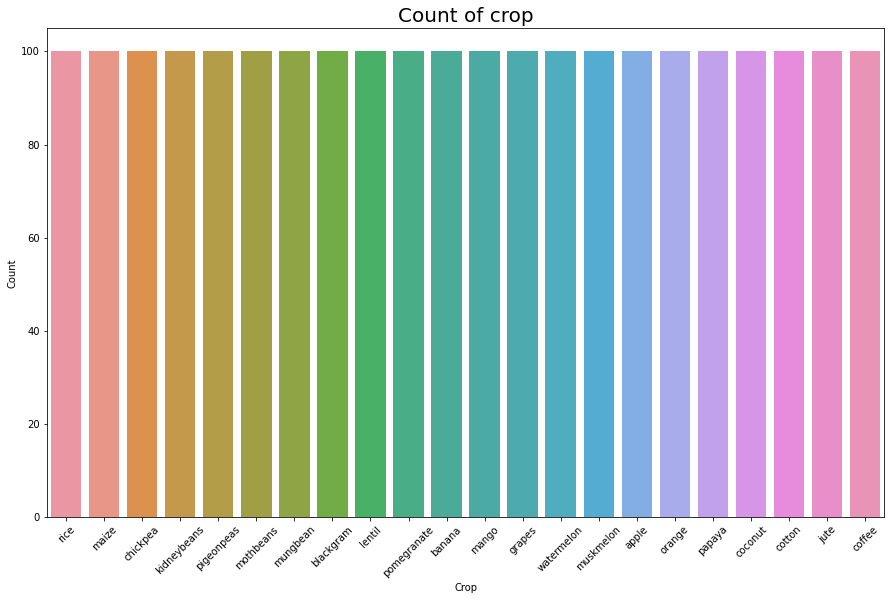

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.countplot(data=df, x='label')
ax.set(xlabel='Crop')
ax.set(ylabel='Count')
plt.xticks(rotation=45)

plt.title('Count of crop', fontsize = 20, c='black')
plt.show()

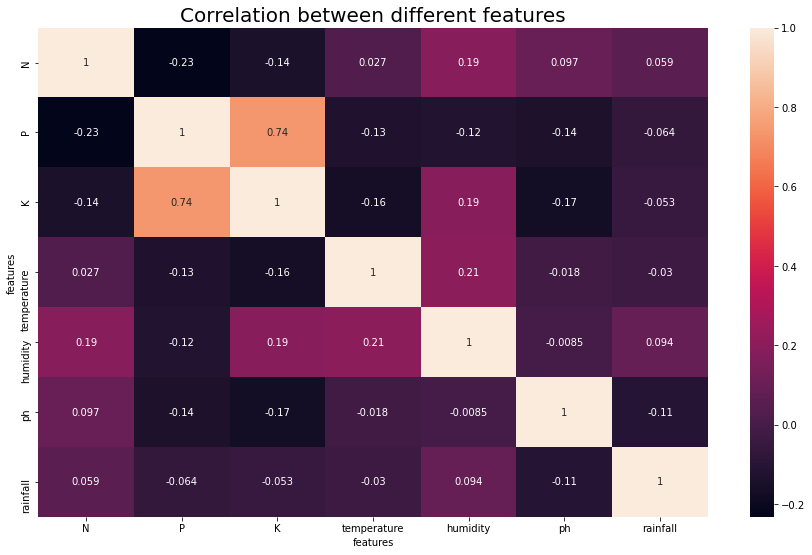

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(df.corr(), annot=True)
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 20, c='black')
plt.show()

In [7]:
target = ['label']
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

X = df[features]
y = df[target]

In [8]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

In [9]:
# !pip install evalml --user

In [10]:
import evalml

In [11]:
evalml.problem_types.ProblemTypes.all_problem_types


[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

In [12]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [14]:
# from evalml.automl import AutoMLSearch
# automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type = 'multiclass')
# automl.search()

In [15]:
# !pip install lazypredict --user

In [16]:
import lazypredict

In [17]:
from lazypredict.Supervised import LazyClassifier


In [18]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:03<00:00,  7.69it/s]


In [19]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.99,0.99,None,0.99,0.02
RandomForestClassifier,0.99,0.99,None,0.99,0.25
QuadraticDiscriminantAnalysis,0.99,0.99,None,0.99,0.02
DecisionTreeClassifier,0.99,0.99,None,0.99,0.02
BaggingClassifier,0.99,0.99,None,0.99,0.07
ExtraTreesClassifier,0.98,0.99,None,0.98,0.16
LGBMClassifier,0.98,0.98,None,0.98,1.28
XGBClassifier,0.98,0.98,None,0.98,0.37
LabelSpreading,0.97,0.97,None,0.97,0.17


In [20]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.99,0.99,None,0.99,0.02
RandomForestClassifier,0.99,0.99,None,0.99,0.25
QuadraticDiscriminantAnalysis,0.99,0.99,None,0.99,0.02
DecisionTreeClassifier,0.99,0.99,None,0.99,0.02
BaggingClassifier,0.99,0.99,None,0.99,0.07
ExtraTreesClassifier,0.98,0.99,None,0.98,0.16
LGBMClassifier,0.98,0.98,None,0.98,1.28
XGBClassifier,0.98,0.98,None,0.98,0.37
LabelSpreading,0.97,0.97,None,0.97,0.17


In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,y_train)

predicted_values = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)

print("Naive Bayes's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes's Accuracy is:  0.9939393939393939
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.89      1.00      0.94        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      1.00      1.00        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00 

In [22]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,X,y,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [23]:
import pickle

NB_pkl_filename = 'NBClassifier.pkl'

NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)

NB_Model_pkl.close()

In [24]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = NaiveBayes.predict(data)
print(prediction)

['jute']


In [25]:
# import evalml
# from evalml.data_checks import TargetLeakageDataCheck

In [26]:
# target_leakage_check = TargetLeakageDataCheck(pct_corr_threshold = 0.8)
# target_leakage_check.validate(X,y)